# Đồ án cuối kì
Họ tên: Nguyễn Thanh Mẫn

MSSV: 1712586

---

## Import

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Lấy dữ liệu

- Dữ liệu được sử dụng trong đồ án là thống kê về số lượng vụ tự sát trong các thành phố ở mỗi năm, được phân chia thành từng nhóm giới tính và độ tuổi khác nhau, kèm theo dân số của từng nhóm và một số thông tin về sự phát triển của thành phố đó trong năm. Nguồn của dữ liệu được lấy tại [đây](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv).

- License ở [đây](https://www.worldbank.org/en/about/legal/terms-of-use-for-datasets).

- Dữ liệu được thu thập từ 4 nguồn khác nhau:

    - [UNDP's Human development index (2018)](http://hdr.undp.org/en/indicators/137506)

    - [World Bank's World development indicators: GDP (current US$) by country: 1985 to 2016 (2018)](http://databank.worldbank.org/data/source/world-development-indicators#)

    - [Szamil's Suicide in the Twenty-First Century dataset (2017)](https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook)

    - [World Health Organization's Suicide prevention](http://www.who.int/mental_health/suicide-prevention/en/)

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols = df.shape
print("Dataset has {0} rows and {1} cols".format(num_rows, num_cols))

Dataset has 27820 rows and 12 cols


### Mỗi dòng và mỗi cột có ý nghĩa gì?

Mô tả về các cột của file "who_suicide_statistics.csv":
- **country**: thành phố.
- **year**: năm.
- **sex**: giới tính, gồm nam (male) và nữ (female).
- **age**: nhóm tuổi.
- **suicides_no**: số lượng vụ tự sát.
- **population**: dân số thuộc nhóm tuổi và thành phố đó.
Mỗi dòng là số liệu thống kê các vụ tự sát trong mỗi thành phố, nhóm tuổi và năm.
- **suicides/100k pop**: tỉ lệ tự sát của nhóm tuổi đó trên 100 000 người.
- **country-year**: ghép giữa 2 cột **country** và **year** (cột này có vẻ không cần thiết nên sẽ lược bỏ trong bước tiền xử lý).
- **HDI for year**: chỉ số phát triển con người trong năm của thành phố đó ([Chỉ số phát triển con người là gì?](https://vi.wikipedia.org/wiki/Ch%E1%BB%89_s%E1%BB%91_ph%C3%A1t_tri%E1%BB%83n_con_ng%C6%B0%E1%BB%9Di)).
- **gdp_for_year**: chỉ số GDP trong năm của thành phố đó.
- **gdp_per_capita**: chỉ số GDP/ người.
- **generation**: thế hệ của nhóm tuổi tương ứng vào năm đó (cột này có vấn đề mà mình sẽ giải thích sau).

Mỗi dòng là thống kê các vụ tự sát và thông tin về sự phát triển của mỗi nhóm tuổi sống trong một thành phố trong mỗi năm.

### Mỗi cột có dtype là gì?

In [4]:
col_dtypes = df.dtypes
col_dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

## Tiền xử lý

### Bỏ cột country-year

In [5]:
df.drop(columns='country-year', inplace=True)

### Chỉnh lại tên của các cột cho hợp lý

In [6]:
df.rename(columns={
    df.columns[2]: 'gender',
    df.columns[4]: 'nsuicides',
    df.columns[6]: 'crudeRate',
    df.columns[7]: 'HDIyear',
    df.columns[8]: 'GDPyear',
    df.columns[9]: 'GDPcap'
},
          inplace=True)

### Bỏ hậu tố ' years' trong các phần tử của cột "age"

In [7]:
df.age = df.age.str.replace(' years', '')

### Sửa các phần tử "5-14" trong cột "age" thành "05-14" để dễ sort

In [8]:
df.loc[df.age == '5-14', 'age'] = '05-14'

### Chỉnh dtype của cột "GDPyear" thành dạng numeric

Cột "GDPyear" đang có dtype là object, để chuyển thành dạng numeric trước tiên ta cần loại bỏ các dấu phẩy của tất cả các hàng trong cột

In [9]:
df.GDPyear = df.GDPyear.str.replace(',', '')

Sau khi bỏ hết dấu phẩy, dùng `pd.to_numeric` để chuyển dtype thành dạng numeric

In [10]:
df.GDPyear = pd.to_numeric(df.GDPyear)

## Quay lại bước khám phá dữ liệu

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     27820 non-null  object 
 1   year        27820 non-null  int64  
 2   gender      27820 non-null  object 
 3   age         27820 non-null  object 
 4   nsuicides   27820 non-null  int64  
 5   population  27820 non-null  int64  
 6   crudeRate   27820 non-null  float64
 7   HDIyear     8364 non-null   float64
 8   GDPyear     27820 non-null  int64  
 9   GDPcap      27820 non-null  int64  
 10  generation  27820 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 2.3+ MB


### Các cột dạng numeric có miền giá trị như thế nào?

Hiện đang có $6$ cột có dạng numeric. Miền giá trị của từng cột sẽ được lưu vào dataframe `col_ranges_df` có $2$ dòng là "min", "max" và $7$ cột là  "nsuicides", "population", "crudeRate", "HDIyear", "GDPyear", "GDPcap".

In [12]:
numeric_cols = [
    "nsuicides", "population", "crudeRate", "HDIyear", "GDPyear", "GDPcap"
]
col_ranges_df = pd.DataFrame()
col_ranges_df['min'] = df[numeric_cols].min()
col_ranges_df['max'] = df[numeric_cols].max()
col_ranges_df = col_ranges_df.T.astype(df[numeric_cols].dtypes.to_dict())
col_ranges_df

,nsuicides,population,crudeRate,HDIyear,GDPyear,GDPcap
min,0,278,0.00,0.483,46919625,251
max,22338,43805214,224.97,0.944,18120714000000,126352


### Các cột dạng categorical có các giá trị nào? 

Các cột dạng categorical: "year", "country", "gender", "age", "generation". Các giá trị của cột sẽ được lưu vào dataframe `cat_col_ranges_df` có $2$ dòng là "NumUniqueVals", "SomeFirstVals và $4$ cột "year", "country", "gender", "age".

In [13]:
cat_cols = ["year", "country", "gender", "age"]
cat_col_ranges_df = pd.DataFrame(columns=cat_cols)
cat_col_ranges_df.loc["NumUniqueVals"] = [
    df[col].nunique() for col in cat_col_ranges_df.columns
]
cat_col_ranges_df.loc["SomeFirstVals"] = [
    np.sort(df[col].unique())[:3].tolist() for col in cat_col_ranges_df.columns
]
cat_col_ranges_df

,year,country,gender,age
NumUniqueVals,32,101,2,6
SomeFirstVals,"[1985, 1986, 1987]","[Albania, Antigua and Barbuda, Argentina]","[female, male]","[05-14, 15-24, 25-34]"


### Mỗi cột có bao nhiêu phần trăm giá trị thiếu?

In [14]:
col_num_nans = np.round(df.isnull().mean() * 100, 1)
col_num_nans

country        0.0
year           0.0
gender         0.0
age            0.0
nsuicides      0.0
population     0.0
crudeRate      0.0
HDIyear       69.9
GDPyear        0.0
GDPcap         0.0
generation     0.0
dtype: float64

Cột "HDIyear" bị thiếu khá nhiều (số giá trị thiếu lên tới gần $70\%$) nên ta sẽ bỏ cột này

In [15]:
df.drop(columns='HDIyear', inplace=True)

### Cột nào bị bất hợp lý?

Cột 'generation' là cột bất hợp lý. Vì sao vậy?

In [16]:
df.groupby(['year', 'generation']).age.unique().unstack().loc[1985:1986]

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
year,,,,,,
1985,[25-34],"[55-74, 75+]","[15-24, 05-14]",NaN,NaN,[35-54]
1986,[25-34],"[55-74, 75+]","[15-24, 05-14]",NaN,NaN,[35-54]


Theo như hiểu biết của mình, thế hệ (generation) chỉ được phân ra dựa trên **năm sinh** của một người chứ không phải là **số tuổi**. Vì thế, nhóm tuổi tương ứng của một thế hệ phải **khác nhau** qua từng năm. Ví dụ nếu lấy năm 1985 làm mốc, thì dữ liệu định nghĩa rằng: thế hệ G.I Generation trong năm 1985 là những người có tuổi từ **55** trở lên, như vậy đáng lẽ sau 1 năm (1986) thì thế hệ này phải là những người có số tuổi từ **56** trở lên, nhưng trong dữ liệu vẫn là [55-74, 75+].

In [17]:
df.groupby(['year', 'generation']).age.unique().unstack().loc[[2015]]

generation,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
year,,,,,,
2015,[55-74],NaN,[35-54],[05-14],"[15-24, 25-34]",[75+]


Trên thực tế, người ta phân chia thế hệ khác hoàn toàn so với dữ liệu. Theo bài báo [The Whys and Hows of Generations Research](https://www.pewresearch.org/politics/2015/09/03/the-whys-and-hows-of-generations-research/), trong năm 2015, thế hệ Milenials có số tuổi từ 18 đến 34, khác với dữ liệu là từ 15 đến 34.

Vì cột 'generation' có sự bất hợp lý nên ta có thể bỏ cột này

In [18]:
df.drop(columns='generation', inplace=True)

---

## Đưa ra các câu hỏi cần trả lời

### <span class="burk">Câu hỏi 1</span> ***Trong mỗi năm, thành phố nào có tỉ lệ tự sát cao nhất?***

Tìm ra thành phố có nguy cơ tự sát cao nhất để những thành phố có thể can thiệp hợp lý để cải thiện về chất lượng cuộc sống và tinh thần của người dân.

Để tính tỉ lệ tự sát cho toàn dân số thuộc tất cả các nhóm tuổi của mỗi thành phố trong một năm, ta dùng `df.groupby` theo `country` và `year` rồi tính tổng số ca tự sát chia cho tổng số dân rồi nhân cho $100000$.

In [19]:
gb_df = df.groupby(['country', 'year'])
crudeRateGeneral = (gb_df.nsuicides.sum() /
                    (gb_df.population.sum() / 100000)).unstack()

#### Trả lời câu hỏi:

Câu trả lời được biểu diễn bằng dataframe `most_concerning_countries` có 2 cột là "Country with highest rate", "Highest rate" và các dòng là năm. Mỗi giá trị được đi kèm với tỉ lệ tự sát của thành phố đó trong năm.

In [20]:
# Lấy ra các thuộc tính 'idxmax', 'max'
most_concerning_countries = crudeRateGeneral.agg(['idxmax', 'max']).T
# Làm tròn số cho cột bằng hàm apply
most_concerning_countries['max'] = most_concerning_countries['max'].apply(
    lambda x: round(x, 2))
most_concerning_countries.columns = ["Country with highest rate", "Highest rate"]
most_concerning_countries

,Country with highest rate,Highest rate
1985,Sri Lanka,40.90
1986,Sri Lanka,37.90
1987,Finland,29.54
1988,Finland,30.26
1989,Finland,30.36
1990,Finland,32.34
1991,Hungary,40.92
1992,Hungary,41.00
1993,Russian Federation,40.56
1994,Russian Federation,44.35


#### Kết luận

Đáng chú ý là tỉ lệ tự sát đáng báo động của [Lithuania](https://en.wikipedia.org/wiki/Suicide_in_Lithuania), khi mà nước này là nước có tỉ lệ [cao nhất](https://theculturetrip.com/europe/lithuania/articles/this-country-has-among-the-highest-suicide-rates-in-the-world/) kéo dài từ năm 1995 đến 2016.

### <span class="burk">Câu hỏi 2</span> ***Qua thời gian, tìm ra 3 thành phố với tỉ lệ tự sát có xu hướng tăng lên mạnh nhất và 3 thành phố với tỉ lệ tự sát có xu hướng giảm xuống mạnh nhất (chỉ xét trong những thành phố có ít nhất 50% dữ liệu hợp lệ)***

Có một câu hỏi nhức nhối về vấn đề này, đó là "Does it get better?" (Tạm dịch: "Có phải mọi chuyện sẽ ổn không?"). Sau khi trả lời được câu hỏi trên, ta có thể biết được tình hình về nguy cơ tự sát của thành phố nào đang khá hơn, thành phố nào đang ngày càng trầm trọng hơn. Từ đó ta có thêm cái nhìn rõ ràng về tình hình về vấn đề tự sát của riêng từng thành phố và thế giới nói chung.

Ở câu hỏi này, dĩ nhiên ta không thể vẽ biểu đồ cho tất cả $101$ thành phố được. Vì thế ta sẽ dùng mô hình hồi quy tuyến tính đơn giản "$y = ax+b$"  ($y$ là `crudeRateGeneral` còn $x$ là `year`) để đo độ tăng (giảm) của tỉ lệ tự sát qua các năm. Nếu $a$ càng dương thì tỉ lệ tăng càng lớn, nếu $a$ càng âm thì tỉ lệ giảm càng lớn.

Vì ta chỉ xét những thành phố có ít nhất $50\%$ dữ liệu hợp lệ, ta chỉ giữ những dòng nào có ít nhất $16$ dữ liệu hợp lệ.

In [21]:
crudeRateGeneral.dropna(thresh=16, inplace=True)

In [22]:
a = []
for i in range(crudeRateGeneral.shape[0]):
    # Lọc dòng thứ i (bỏ cột nào có giá trị NaN) rồi lưu vào Y
    Y = crudeRateGeneral.iloc[[i]].dropna(axis=1)
    # Lấy tên cột của Y lưu vào X
    X = np.array(Y.columns)
    # Chuyển vị Y rồi thêm cột 1 vào sau
    Y = np.array(Y).T
    Y = np.hstack((Y, np.ones(Y.shape)))
    # Chuyển X thành ma trận 2 chiều
    X = X.reshape((Y.shape[0], 1))
    # Tìm ra đường hồi quy rồi lấy ra 'a' và append vào danh sách
    a.append((LinearRegression().fit(X, Y).coef_)[0, 0])
a = np.array(a) 

In [23]:
# Lưu kết quả vào Series result với index là các thành phố
result = pd.Series(data=a, index=crudeRateGeneral.index)
result.sort_values(inplace=True)
result

country
Estonia             -1.308874
Latvia              -1.037742
Lithuania           -0.933651
Hungary             -0.783661
Slovenia            -0.649019
                       ...   
Chile                0.268346
Uruguay              0.312896
Suriname             0.536502
Guyana               0.925073
Republic of Korea    0.930579
Length: 81, dtype: float64

#### Vẽ biểu đồ

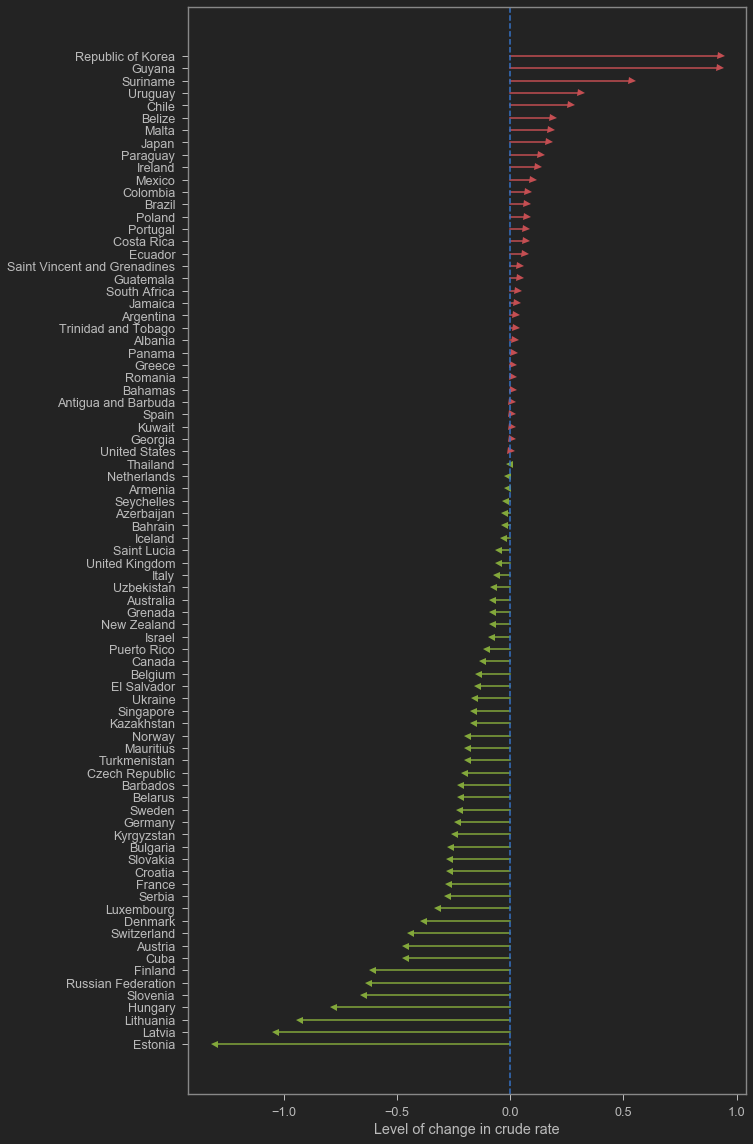

In [24]:
plt.figure(figsize=[10, 20])
for (value, index) in zip(result.values, result.index):
    if value > 0:
        plt.plot([0, value], [index, index], c='r')
        plt.plot(value, index, 'r>')
    else:
        plt.plot([0, value], [index, index], c='g')
        plt.plot(value, index, 'g<')
plt.axvline(x=0, ls='--')
plt.xlabel("Level of change in crude rate");

#### Từ biểu đồ, ta có thể đưa ra câu trả lời cho câu hỏi

- Top 3 thành phố / quốc gia với tỉ lệ tự sát có xu hướng tăng mạnh nhất: Hàn Quốc, Guyana và Suriname.
- Top 3 thành phố / quốc gia với tỉ lệ tự sát có xu hướng giảm mạnh nhất: Estonia, Latvia, Lithuania.

Một điểm thú vị là Lithuania dù là nước có tỉ lệ tự sát cao nhất kéo dài từ năm 1995 đến 2016, nhưng lại thuộc top 3 có tỉ lệ tự sát giảm mạnh nhất. Đây là một dấu hiệu đáng mừng cho đất nước này.

#### Trong số các thành phố có đủ dữ liệu, tỉ lệ thành phố có tỉ lệ tự sát có xu hướng tăng và giảm là bao nhiêu?

In [25]:
icr = np.round(np.mean(a > 0) * 100, 1)
dcr = np.round(np.mean(a < 0) * 100, 1)
print(
    "In valid countries, there are about {0}% of countries with increasing crude rate and about {1}% with decreasing crude rate"
    .format(icr, dcr))

In valid countries, there are about 40.7% of countries with increasing crude rate and about 59.3% with decreasing crude rate


Đây có vẻ là con số khả quan khi có nhiều thành phố giảm tỉ lệ tự sát hơn là tăng.

### <span class="mark">Câu hỏi 3</span> Biến `year` và `GDPcap` (trên từng quốc gia có ít nhất $50\%$ dữ liệu hợp lệ) có quan hệ như thế nào?

Ý nghĩa của câu hỏi này sẽ được rút ra sau khi trả lời.

Để trả lời câu hỏi này, ta cần tính mức độ tuyến tính (correlation coefficent) `r` của hai biến `year` và `GDPcap` trên từng thành phố. Nhưng trước hết ta cần trích ra `GDPcap` của mỗi thành phố cho từng năm và chỉ giữ những thành phố nào có ít nhất $50\%$ dữ liệu hợp lệ.

In [26]:
GDPcap = gb_df.GDPcap.unique().unstack().dropna(thresh=16)
GDPcap.sample(5)

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,,,,,,,,,,,,,,,,,,,,,
Suriname,[2706],[2731],[2951],[3418],[1560],[1114],[1235],[1093],NaN,NaN,...,[6397],[7601],[8238],[9176],[9184],[10227],[10451],[10530],NaN,NaN
Kuwait,[14607],[11661],[13924],NaN,NaN,NaN,NaN,NaN,[18798],[17161],...,[37283],[43746],[33453],[35171],[46203],[49781],[48729],[43774],NaN,NaN
Bulgaria,[2044],[2413],[3355],[2688],[2617],[2451],[1298],[1287],[1354],[1213],...,[6073],[7487],[7186],[7066],[8137],[7745],[8057],[8241],NaN,NaN
Sweden,NaN,NaN,[22813],[25731],[26978],[32246],[33623],[34721],[25880],[27658],...,[56531],[59155],[49070],[55352],[63380],[60776],[64133],[62956],[54629],[55594]
Mauritius,[1223],[1636],[2073],[2317],[2349],[2820],[3045],[3400],[3405],[3658],...,[7179],[8716],[7873],[8587],[9817],[9884],[10572],[11120],[10125],[10570]


In [27]:
avg_r = 0
for i in range(GDPcap.shape[0]):
    # Trích dòng thứ i, loại bỏ NaN, chuyển list thành số rồi lưu vào X
    X = GDPcap.iloc[i].dropna().apply(lambda x: x[0])
    # Trích các index của X lưu vào Y
    Y = np.array(X.index)
    # Đưa X và y về đơn vị chuẩn
    X = np.array((X - X.mean()) / X.std())
    Y = (Y - Y.mean()) / Y.std()
    # Cập nhật giá trị correllation trung bình
    avg_r += np.mean(X * Y) / GDPcap.shape[0]
avg_r

0.8807841076160243

Con số này cho thấy nhìn chung thì biến `GDPcap` có mối quan hệ tuyến tính đồng biến *mạnh* với biến `year`, hay nói cách khác là GDP bình quân đầu người của các thành phố nhìn chung đều tăng theo thời gian.

#### Rút ra được điều gì?

Từ câu hỏi nhỏ trên ta rút ra được một sự thật là: chất lượng cuộc sống của người dân nhìn chung ngày càng được cải thiện. Tuy nhiên, theo biểu đồ ở <span class="burk">Câu hỏi 2</span> tuỳ vào thành phố / quốc gia mà tỉ lệ tự sát tăng hay giảm. Có nghĩa là không phải lúc nào chất lượng cuộc sống tốt hơn đều khiến con người trở nên hạnh phúc hơn, hay nói đơn giản là: "Không phải lúc nào tiền cũng làm bạn hạnh phúc".

### <span class="burk">Câu hỏi 3</span> ***Qua các năm, nhóm tuổi nào có số lượng vụ tự sát nhiều nhất, có tỉ lệ tự sát cao nhất?***

Ta đã biết rằng mỗi nhóm tuổi đều phải đối mặt với nhiều áp lực khác nhau. Khi trả lời được câu hỏi trên, ta biết được ảnh hưởng của những áp lực này lên từng nhóm tuổi là như thế nào.

In [28]:
gb_age_df = df.groupby(['year', 'age'])

#### Tính tổng số vụ tự tử trên toàn cầu theo mỗi nhóm tuổi

In [29]:
nsuicidesAge = gb_age_df.nsuicides.sum().unstack()

#### Tính tỉ lệ tự tử trên toàn cầu theo mỗi nhóm tuổi

In [30]:
crudeRateAge = (gb_age_df.nsuicides.sum() /
                (gb_age_df.population.sum() / 100000)).unstack()

#### Biểu diễn hai biểu đồ bằng các subplot

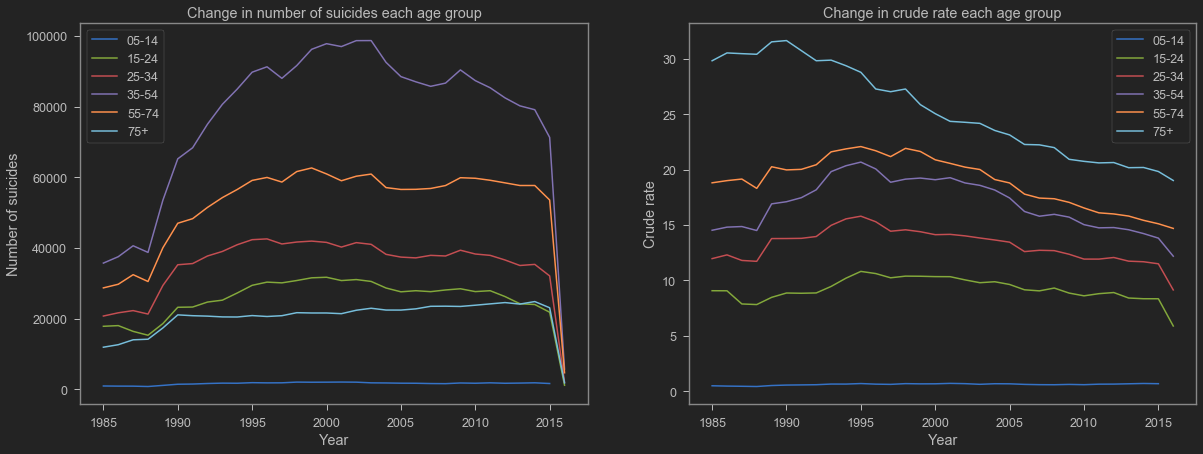

In [31]:
plt.figure(figsize=[20, 7])
plt.subplot(1, 2, 1)
plt.plot(nsuicidesAge)
plt.legend(nsuicidesAge.columns)
plt.title("Change in number of suicides each age group")
plt.ylabel("Number of suicides")
plt.xlabel("Year")
plt.subplot(1, 2, 2)
plt.plot(crudeRateAge)
plt.legend(crudeRateAge.columns)
plt.title("Change in crude rate each age group")
plt.ylabel("Crude rate")
plt.xlabel("Year");

#### Trả lời cho câu hỏi

Ở đây có 2 nhóm tuổi đáng chú ý là nhóm "35-54" và nhóm "75+".
- Nhóm "35-54" luôn có số ca tự tử cao nhất.
- Nhóm "75+" luôn có tỉ lệ tự tử cao nhất.

#### Kết luận

- Nếu có người chết vì tự tử thì khả năng cao người đó thuộc nhóm tuổi từ 35 đến 54.
- Người thuộc nhóm tuổi 75+ có nguy cơ tự tử cao nhất.

### <span class="burk">Câu hỏi 4</span> ***Trải qua các năm, tỉ lệ tự tử của nam hay nữ cao hơn và thay đổi như thế nào?***

Người ta thường nói phụ nữ dễ trầm cảm hơn đàn ông, như vậy có phải nữ có nguy cơ tự tử nhiều hơn nam? Sau khi trả lời được câu hỏi trên, ta có thể biết thêm một sự thật thú vị về sự khác biệt giữa hai giới khi đối mặt với những vấn đề về tâm lý.

Để trả lời tổng quát cho câu hỏi này, ta lấy số ca tự tử của nam và của nữ, chia cho dân số nam và nữ trong từng năm.

In [32]:
gender_gb_df = df.groupby(['year', 'gender'])
gender_rate = (gender_gb_df.nsuicides.sum() /
               (gender_gb_df.population.sum() / 100000)).unstack()

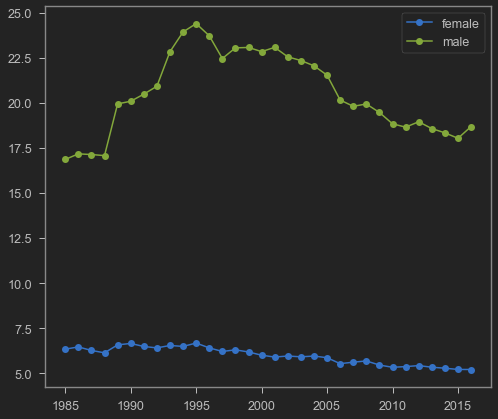

In [33]:
plt.plot(gender_rate, marker='o')
plt.legend(gender_rate.columns);

#### Trả lời cho câu hỏi

Từ biểu đồ ta có thể thấy:
- Tỉ lệ tự tử của nữ nhìn chung là giảm.
- Tỉ lệ tự tử của nam tăng lên cao nhất ở năm 1995 rồi có xu hướng giảm sau đó.

#### Rút ra được điều gì sau khi trả lời câu hỏi?

Dù là trong thời gian nào, đàn ông luôn có nguy cơ tự tử cao hơn phụ nữ. ***Vì sao lại vậy nhỉ?***

Trích trong [Bài về tự sát của Wikipedia](https://vi.wikipedia.org/wiki/T%E1%BB%B1_s%C3%A1t#Gi%E1%BB%9Bi_t%C3%ADnh)
>Nam giới bị chết bởi tự sát nhiều hơn nữ giới, mặc dù nữ giới lại cố gắng tự sát nhiều hơn. Một số chuyên gia xã hội cho rằng nam giới tự sát nhiều hơn do bất cân bằng luật pháp giữa hai giới tính

>Trong The Eclipse: A Memoir of Suicide, tác giả Antonella Gambotto-Burke báo cáo rằng ở những nước phương Tây, nam giới đang dẫn đầu "tỷ lệ tự hủy diệt" (chiếm 40% tổng số các vụ tự sát) và "nguyên nhân của quyết định tự sát thường là do cuộc sống cách ly, thất nghiệp và nợ nần. Giới tính nam có bản chất là (hoạt động) chinh phục... Biểu hiện của cái gốc tự trọng trong nam giới là họ bỏ qua mọi xúc cảm đơn thể (sự chinh phục đòi hỏi phải có 1 đối tác). Một người đàn ông không thể cảm thấy mình là đàn ông nếu họ không có 1 đối tác, một đoàn thể hoặc một nhóm. Nam tính là một trò được chơi trên bình diện đối xứng. Do đó, ý nghĩa của nam giới tự tan rã khi đối tác vắng mặt."

---

# Nhìn lại quá trình làm đồ án

### Khó khăn

- Tìm ra câu hỏi có ý nghĩa
- Tìm ra được dạng biểu đồ hợp lí cho <span class="burk">Câu hỏi 2</span>

### Đã học được những gì

- Sử dụng các thư viện Numpy, Pandas và Matplotlib hiệu quả hơn
- Biết được những kiến thức xã hội như cách phân biệt thế hệ (generation), vấn đề tự tử của các nước...

# Tài liệu tham khảo

[Hey you!! Suicide is not a solution](https://www.kaggle.com/snanilim/hey-you-suicide-is-not-a-solution)

[Suicides over different perspectives](https://www.kaggle.com/papeloto/suicides-over-different-perspectives)

[The Whys and Hows of Generations Research](https://www.pewresearch.org/politics/2015/09/03/the-whys-and-hows-of-generations-research/)

[Bài về tự sát của Wikipedia](https://vi.wikipedia.org/wiki/T%E1%BB%B1_s%C3%A1t#Gi%E1%BB%9Bi_t%C3%ADnh)